# Feature Engineering

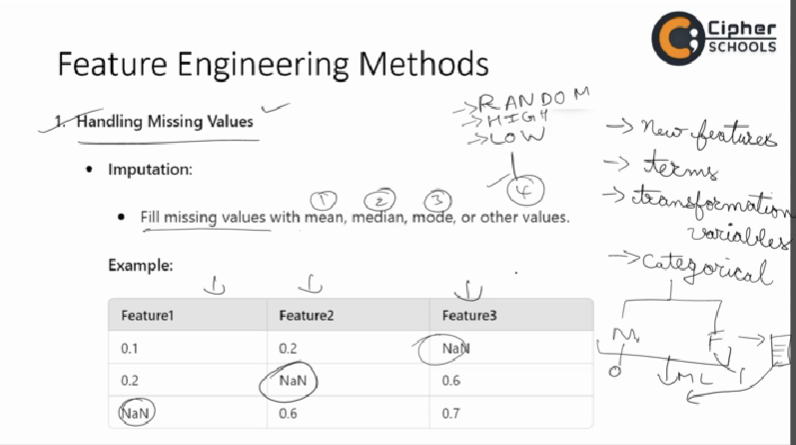

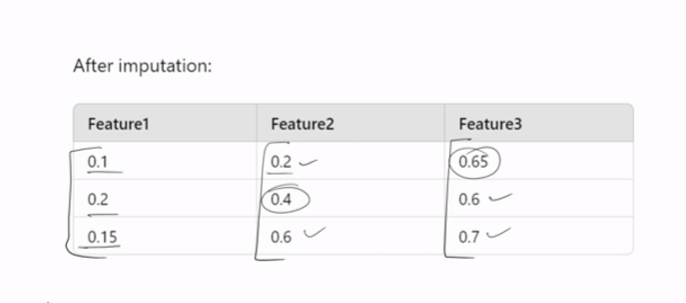

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
data = {
    'Feature 1' : [1.0,2.0,None,4.0,5.0],
    'Feature 2' : [2.0,None,4.0,5.0,None],
    'Feature 3' : [None,3.0,3.5,4.0,4.5]
}
df=pd.DataFrame(data)
print("Before Imputation: \n",df)

#Handling missing values

imputer=SimpleImputer(strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print("After Imputation: \n",df_imputed)

Before Imputation: 
    Feature 1  Feature 2  Feature 3
0        1.0        2.0        NaN
1        2.0        NaN        3.0
2        NaN        4.0        3.5
3        4.0        5.0        4.0
4        5.0        NaN        4.5
After Imputation: 
    Feature 1  Feature 2  Feature 3
0        1.0   2.000000       3.75
1        2.0   3.666667       3.00
2        3.0   4.000000       3.50
3        4.0   5.000000       4.00
4        5.0   3.666667       4.50


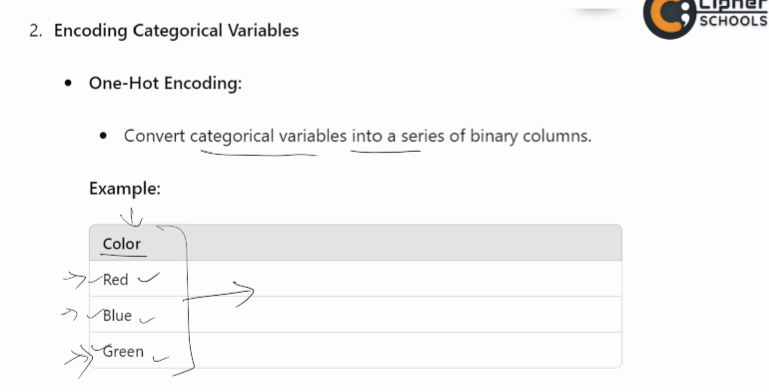

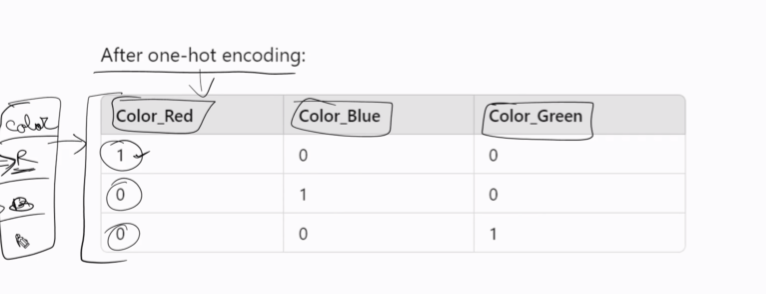

In [14]:
from sklearn.preprocessing import OneHotEncoder

data={
    'Color':['Red','Blue','Green','Blue','Red']
}

df=pd.DataFrame(data)

#Encoding categorical variables

encoder=OneHotEncoder(sparse=False) #Object Creation
encoded_categories=encoder.fit_transform(df)
df_encoded=pd.DataFrame(encoded_categories, columns = encoder.get_feature_names_out(['Color']))
print(f'Encoded DataFrame : \n{df_encoded} \n')


df=pd.concat([df,df_encoded],axis=1) #Joining encoded df and normal df
df=df.drop(['Color'],axis=1) #drop color column
print("After One-Hot Encoding: \n",df)
print("\n")


Encoded DataFrame : 
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0 

After One-Hot Encoding: 
    Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


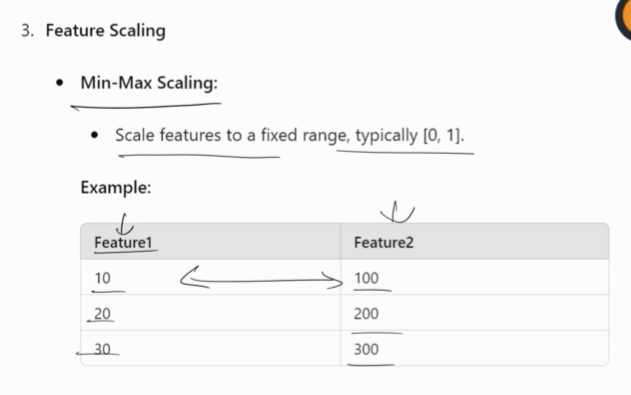

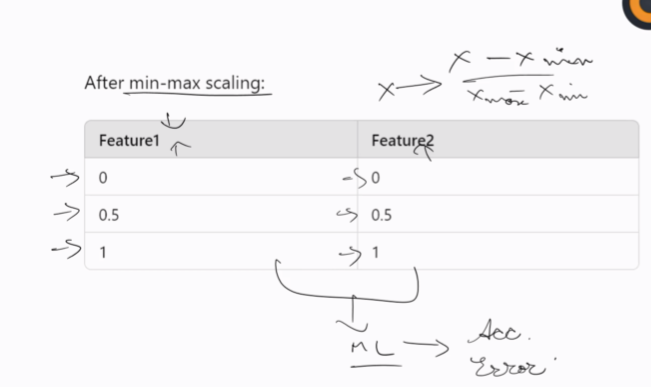

In [20]:
from sklearn.preprocessing import MinMaxScaler

data={
    'Feature 1':[10,20,30,40,50],
    'Feature 2':[100,200,300,400,600]
}
df=pd.DataFrame(data)

#Feature Scaling
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
print("After Min-Max Scaling : \n",df_scaled)

After Min-Max Scaling : 
    Feature 1  Feature 2
0       0.00        0.0
1       0.25        0.2
2       0.50        0.4
3       0.75        0.6
4       1.00        1.0


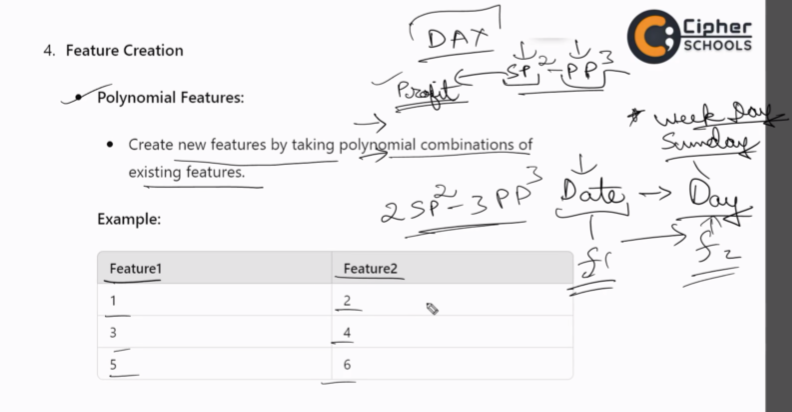

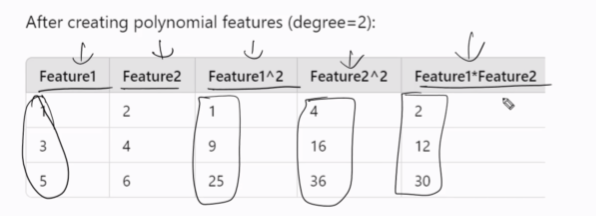

In [32]:
from sklearn.preprocessing import PolynomialFeatures

data={
    'Feature 1':[1,2,3,4,5],
    'Feature 2':[2,3,4,5,6]
}
df=pd.DataFrame(data)

#Feature Creation
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(df)
df_poly=pd.DataFrame(poly_features,columns=poly.get_feature_names_out(['Feature 1','Feature 2']))
print(df_poly,"\n")
df_poly.drop(columns=['Feature 1 Feature 2'],inplace=True)

print(f'After dropping column :\n {df_poly}')

   Feature 1  Feature 2  Feature 1^2  Feature 1 Feature 2  Feature 2^2
0        1.0        2.0          1.0                  2.0          4.0
1        2.0        3.0          4.0                  6.0          9.0
2        3.0        4.0          9.0                 12.0         16.0
3        4.0        5.0         16.0                 20.0         25.0
4        5.0        6.0         25.0                 30.0         36.0 

After dropping column :
    Feature 1  Feature 2  Feature 1^2  Feature 2^2
0        1.0        2.0          1.0          4.0
1        2.0        3.0          4.0          9.0
2        3.0        4.0          9.0         16.0
3        4.0        5.0         16.0         25.0
4        5.0        6.0         25.0         36.0


# Feature Selection

Selecting important features for ML models


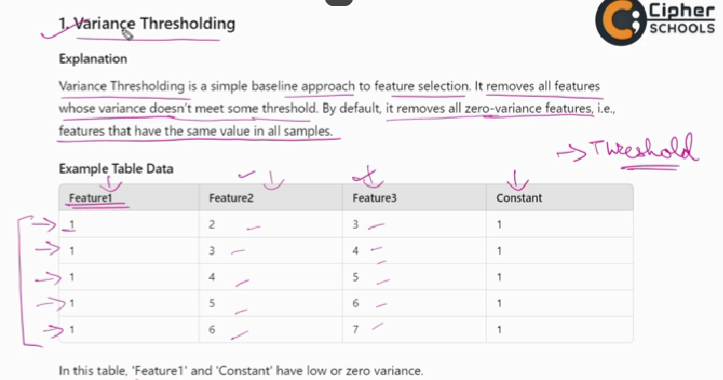

In [34]:
from sklearn.feature_selection import VarianceThreshold

data={
    'Feature 1' :[1,1,1,1,1], #Zero vAriance
    'Feature 2' : [2,3,4,5,6],
    'Feature 4' : [3,4,5,6,7],
    'Feature 5' : [1,1,1,1,1] #Zero Variance

}

df=pd.DataFrame(data)
selector=VarianceThreshold(threshold=0.1)
df_variance_filtered=pd.DataFrame(selector.fit_transform(df),columns=df.columns[selector.get_support()])
print(df_variance_filtered)

   Feature 2  Feature 4
0          2          3
1          3          4
2          4          5
3          5          6
4          6          7


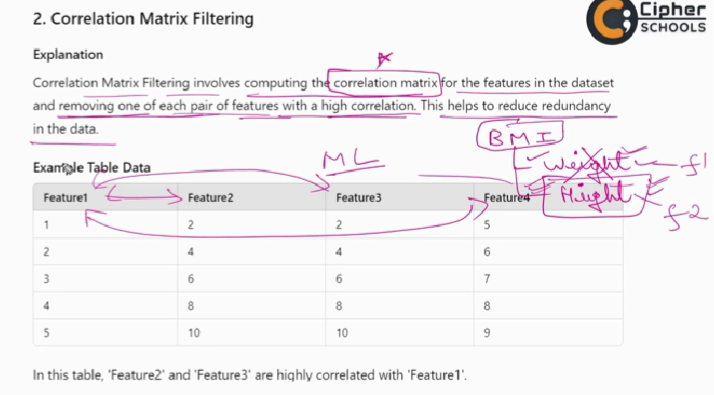

Correlation Matrix 
            Feature 1  Feature 2  Feature 3  Feature 4
Feature 1        1.0        1.0        1.0        1.0
Feature 2        1.0        1.0        1.0        1.0
Feature 3        1.0        1.0        1.0        1.0
Feature 4        1.0        1.0        1.0        1.0 



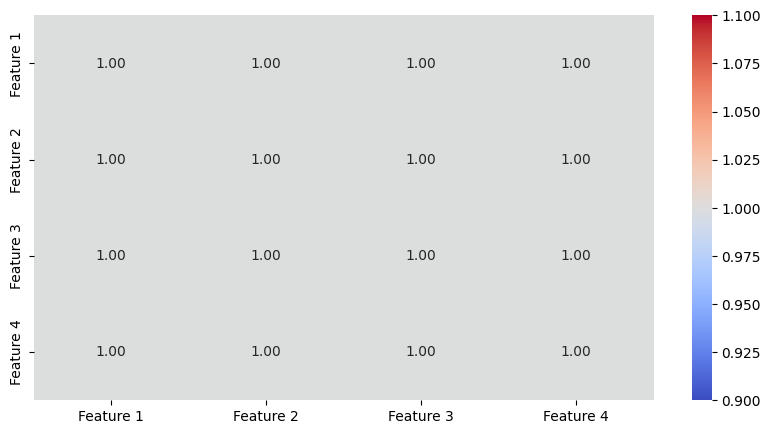



Upper Triangle 
            Feature 1  Feature 2  Feature 3  Feature 4
Feature 1        NaN        1.0        1.0        1.0
Feature 2        NaN        NaN        1.0        1.0
Feature 3        NaN        NaN        NaN        1.0
Feature 4        NaN        NaN        NaN        NaN 

Features to drop 
 ['Feature 2', 'Feature 3', 'Feature 4'] 

After Correlation Matrix Filtering 
    Feature 1
0          1
1          2
2          3
3          4
4          5


In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data ={
    'Feature 1' :[1,2,3,4,5],
    'Feature 2' : [2,4,6,8,10],
    'Feature 3' : [2,4,6,8,10],
    'Feature 4' : [5,6,7,8,9]
}
df=pd.DataFrame(data)

#Correlation matrix
corr_matrix=df.corr().abs()
print(f'Correlation Matrix \n {corr_matrix} \n')

#Plot correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()
print("\n")

#Select Upper triangle of corr matrix (uuper and lower are same)
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
print(f'Upper Triangle \n {upper} \n')

#Find features with correlation greater than 0.9
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print(f'Features to drop \n {to_drop} \n')

#Drop features
df_corr_filtered = df.drop(to_drop,axis=1)
print("After Correlation Matrix Filtering \n",df_corr_filtered)

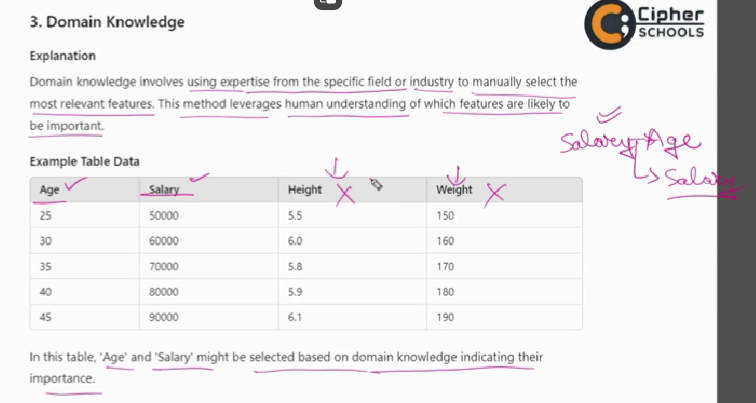

In [47]:
data={
    'Age':[25,30,40],
    'Gender':['Male','Female','Male'],
    'Salary':[50000,60000,70000],
    'Marital Status':['Single','Married','Single']
}
df=pd.DataFrame(data)

#Selecting important columns only
selected_features_domain=df[['Age','Salary']]
print(selected_features_domain)

   Age  Salary
0   25   50000
1   30   60000
2   40   70000
